# Clean and filter the User Dataset

### new dataset more data

import numpy
import pandas
import sklearn

print(numpy.__version__)
print(pandas.__version__)
print(sklearn.__version__)

1.26.4
2.1.4
1.3.2

In [18]:
import pandas as pd

# load the user dataset and select the users in singapore and china
user = pd.read_csv('dataset/user/survey_results_public.csv',low_memory=False)
# select the users in singapore and china
user = user[(user['Country'] == 'Singapore') | (user['Country'] == 'China') | (user['Country'] == 'Japan') | (user['Country'] == 'South Korea')  ]
#user = user[user['Country'] == 'Singapore']
print(user.shape)
user.head(5)

(1943, 129)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
65,96,Yes,Yes,China,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","1,000 to 4,999 employees",Back-end developer;Database administrator;Fron...,...,1 - 2 times per week,Male,Asexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",South Asian,18 - 24 years old,No,NaN,The survey was an appropriate length,Somewhat easy
70,105,Yes,Yes,China,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Another engineering discipline (ex. civil, ele...","10,000 or more employees",Back-end developer;Full-stack developer;QA or ...,...,I don't typically exercise,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",East Asian,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
80,122,Yes,No,Japan,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A business discipline (ex. accounting, finance...",Fewer than 10 employees,Back-end developer;Embedded applications or de...,...,1 - 2 times per week,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,25 - 34 years old,No,NaN,The survey was an appropriate length,Very easy
193,294,Yes,No,Japan,"Yes, part-time",Employed part-time,Some college/university study without earning ...,NaN,500 to 999 employees,Back-end developer;Front-end developer;Full-st...,...,Daily or almost every day,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,25 - 34 years old,No,NaN,The survey was an appropriate length,Neither easy nor difficult
196,297,Yes,No,China,"Yes, full-time",Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A business discipline (ex. accounting, finance...",100 to 499 employees,Back-end developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# print the columns with more than 100 NULL values
col_rem = user.columns[user.isnull().sum() > 100]
print(len(col_rem))
for i in range(len(col_rem)):
    #print(col_rem[i])
    print("")
# remove the unrelated columns from the column list

colname_list = [
"HypotheticalTools1",
"HypotheticalTools2",
"HypotheticalTools3",
"HypotheticalTools4",
"HypotheticalTools5",
"AssessJob1",
"AssessJob2",
"AssessJob3",
"AssessJob4",
"AssessJob5",
"AssessJob6",
"AssessJob7",
"AssessJob8",
"AssessJob9",
"AssessJob10",
"AssessBenefits1",
"AssessBenefits2",
"AssessBenefits3",
"AssessBenefits4",
"AssessBenefits5",
"AssessBenefits6",
"AssessBenefits7",
"AssessBenefits8",
"AssessBenefits9",
"AssessBenefits10",
"JobContactPriorities1",
"JobContactPriorities2",
"JobContactPriorities3",
"JobContactPriorities4",
"JobContactPriorities5",
"JobEmailPriorities1",
"JobEmailPriorities2",
"JobEmailPriorities3",
"JobEmailPriorities4",
"JobEmailPriorities5",
"JobEmailPriorities6",
"JobEmailPriorities7",
"HopeFiveYears",
"JobSatisfaction",  #
"CareerSatisfaction",
"UpdateCV",
"Currency",
"SalaryType",
"ConvertedSalary",
"CurrencySymbol",
"CommunicationTools",
"TimeFullyProductive",
"EducationTypes",
"SelfTaughtTypes",
"TimeAfterBootcamp",
"HackathonReasons",
"AgreeDisagree1",
"AgreeDisagree2",
"AgreeDisagree3",
"LanguageDesireNextYear",
"DatabaseDesireNextYear",
"PlatformDesireNextYear",
"FrameworkDesireNextYear",
"Methodology",
"VersionControl",
"CheckInCode",
"AdBlockerDisable",
"AdBlockerReasons",
"AdsAgreeDisagree1",
"AdsAgreeDisagree3",
"AdsActions",
"AdsPriorities1",
"AdsPriorities2",
"AdsPriorities3",
"AdsPriorities4",
"AdsPriorities5",
"AdsPriorities6",
"AdsPriorities7",
"AIDangerous",
"AIInteresting",
"AIResponsible",
"AIFuture",
"EthicsChoice",
"EthicsReport",
"EthicsResponsible",
"EthicalImplications",
"HypotheticalTools1",
"HypotheticalTools2",
"HypotheticalTools3",
"HypotheticalTools4",
"HypotheticalTools5",
"WakeTime",            # personal info below
"HoursComputer",
"HoursOutside",
"SkipMeals",
"ErgonomicDevices",
"Exercise",
"Gender",
"SexualOrientation",
"EducationParents",
"RaceEthnicity",
"Age",          # decide later
"Dependents",
"MilitaryUS",
"SurveyTooLong",
"SurveyEasy"
]
"""# for stackoverflow
StackOverflowParticipate
StackOverflowDevStory
StackOverflowJobsRecommend
"""
unrelated_cols = []
for col in colname_list:
    unrelated_cols.append(col)
print(unrelated_cols)

125





























































































































['HypotheticalTools1', 'HypotheticalTools2', 'HypotheticalTools3', 'HypotheticalTools4', 'HypotheticalTools5', 'AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9', 'AssessJob10', 'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7', 'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10', 'JobContactPriorities1', 'JobContactPriorities2', 'JobContactPriorities3', 'JobContactPriorities4', 'JobContactPriorities5', 'JobEmailPriorities1', 'JobEmailPriorities2', 'JobEmailPriorities3', 'JobEmailPriorities4', 'JobEmailPriorities5', 'JobEmailPriorities6', 'JobEmailPriorities7', 'HopeFiveYears', 'JobSatisfaction', 'CareerSatisfaction', 'UpdateCV', 'Currency', 'SalaryType', 'ConvertedSalary', 'CurrencySymbol', 'Communic

In [20]:
user_clean = user.drop(columns=unrelated_cols,axis=1)
print(user_clean.shape)
# delete the rows with null values for developer type
user_clean = user_clean.dropna(subset=['DevType'])
# drop the rows with student value for developer type
user_clean = user_clean[~user_clean['DevType'].str.contains('Student')]
user_clean.to_csv('Dataset/user/user_clean.csv',index=False)

(1943, 33)


In [21]:
user_clean.head(5)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,AdBlocker,AdsAgreeDisagree2,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember
65,96,Yes,Yes,China,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","1,000 to 4,999 employees",Back-end developer;Database administrator;Fron...,...,No,Somewhat agree,10 (Very Likely),Daily or almost daily,No,NaN,"No, I didn't know that Stack Overflow had a jo...",NaN,NaN,I'm not sure
70,105,Yes,Yes,China,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Another engineering discipline (ex. civil, ele...","10,000 or more employees",Back-end developer;Full-stack developer;QA or ...,...,No,Neither agree nor disagree,9,Less than once per month or monthly,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...","No, and I don't know what that is",NaN,No
80,122,Yes,No,Japan,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A business discipline (ex. accounting, finance...",Fewer than 10 employees,Back-end developer;Embedded applications or de...,...,Yes,Somewhat disagree,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,Yes,"No, and I don't know what that is",7,No
193,294,Yes,No,Japan,"Yes, part-time",Employed part-time,Some college/university study without earning ...,NaN,500 to 999 employees,Back-end developer;Front-end developer;Full-st...,...,Yes,Strongly agree,10 (Very Likely),A few times per week,Yes,A few times per week,Yes,"No, I have one but it's out of date",10 (Very Likely),Yes
196,297,Yes,No,China,"Yes, full-time",Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A business discipline (ex. accounting, finance...",100 to 499 employees,Back-end developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Respondent          0
Hobby               0
OpenSource          0
Country             0
Student           137
                 ... 
Age               966
Dependents       1014
MilitaryUS       1943
SurveyTooLong     923
SurveyEasy        926
Length: 129, dtype: int64


<Axes: >

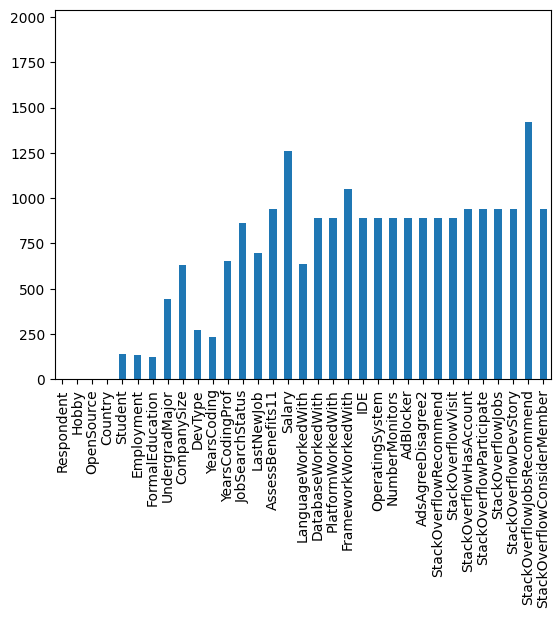

In [22]:
# check the NULL values in the dataset
print(user.isnull().sum())
# plot the graph of the number of Null values in each column
import matplotlib.pyplot as plt
user.isnull().sum().plot(kind='bar')
user.drop(columns=unrelated_cols,axis=1).isnull().sum().plot(kind='bar')


entity list: 所有属性的列表，包含了所有可能的实体，包含了items。(org_id remap_id-数字)
example:ydUqgWsF3F27TbauOyib0w 0

item list：所有职位的列表，包含了所有可能的职位。(org_id remap_id freebase_id) org_id=freespace_id
example:ydUqgWsF3F27TbauOyib0w 0ydUqgWsF3F27TbauOyib0w

user list：所有用户的列表，包含了所有可能的用户。（org_id,remap_id）
example:62GNFh5FySkA3MbrQmnqvg 0

relation list: 所有关系的列表，包含了所有可能的实体对之间的关系。(org_id(字符串) remap_id-数字)
example:attributes::BikeParking 1

train.txt: (user::remap_id,item::remap_id,item::remap_id)

# Process User Dateset and get Skill Sets

In [23]:
# 根据用户数据集中的用户岗位，生成用户-岗位的交互矩阵
import pandas as pd
# load the user dataset
user = pd.read_csv('dataset/user/user_clean.csv',low_memory=False)
user.head(5)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,AdBlocker,AdsAgreeDisagree2,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember
0,96,Yes,Yes,China,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","1,000 to 4,999 employees",Back-end developer;Database administrator;Fron...,...,No,Somewhat agree,10 (Very Likely),Daily or almost daily,No,NaN,"No, I didn't know that Stack Overflow had a jo...",NaN,NaN,I'm not sure
1,105,Yes,Yes,China,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Another engineering discipline (ex. civil, ele...","10,000 or more employees",Back-end developer;Full-stack developer;QA or ...,...,No,Neither agree nor disagree,9,Less than once per month or monthly,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...","No, and I don't know what that is",NaN,No
2,122,Yes,No,Japan,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A business discipline (ex. accounting, finance...",Fewer than 10 employees,Back-end developer;Embedded applications or de...,...,Yes,Somewhat disagree,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,Yes,"No, and I don't know what that is",7,No
3,294,Yes,No,Japan,"Yes, part-time",Employed part-time,Some college/university study without earning ...,NaN,500 to 999 employees,Back-end developer;Front-end developer;Full-st...,...,Yes,Strongly agree,10 (Very Likely),A few times per week,Yes,A few times per week,Yes,"No, I have one but it's out of date",10 (Very Likely),Yes
4,297,Yes,No,China,"Yes, full-time",Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A business discipline (ex. accounting, finance...",100 to 499 employees,Back-end developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Process the categorical columns

### 1. devtype

In [24]:
# get the categorical value of the column 'DevType' in the user dataset and store them in a list
devtype_list = set({})
for i in range(user.shape[0]):
    # ignore the NULL values
    if pd.isnull(user['DevType'].iloc[i]):
        continue
    for item in user['DevType'].iloc[i].split(';'):
        devtype_list.add(item)
print('devtype num: ',len(devtype_list))
print(devtype_list)

devtype num:  19
{'Product manager', 'C-suite executive (CEO, CTO, etc.)', 'Front-end developer', 'Data scientist or machine learning specialist', 'Database administrator', 'Designer', 'Embedded applications or devices developer', 'Mobile developer', 'Marketing or sales professional', 'Game or graphics developer', 'Full-stack developer', 'QA or test developer', 'DevOps specialist', 'Desktop or enterprise applications developer', 'System administrator', 'Back-end developer', 'Engineering manager', 'Educator or academic researcher', 'Data or business analyst'}


### 2.Language worked with

In [25]:
# get the categorical value of the column 'LanguageWorkedWith' in the user dataset and store them in a list
language_list = set({})
for i in range(user.shape[0]):
    # ignore the NULL values
    if pd.isnull(user['LanguageWorkedWith'].iloc[i]):
        continue
    for item in user['LanguageWorkedWith'].iloc[i].split(';'):
        language_list.add(item)
print('LanguageWorkedWith num: ',len(language_list))
print(language_list)

LanguageWorkedWith num:  37
{'JavaScript', 'Visual Basic 6', 'Objective-C', 'Groovy', 'Scala', 'CoffeeScript', 'Bash/Shell', 'C#', 'Rust', 'SQL', 'Delphi/Object Pascal', 'Ruby', 'Java', 'HTML', 'Cobol', 'Assembly', 'VBA', 'VB.NET', 'Go', 'TypeScript', 'C', 'C++', 'Erlang', 'F#', 'Perl', 'Julia', 'Clojure', 'Swift', 'Kotlin', 'CSS', 'R', 'Haskell', 'Matlab', 'Ocaml', 'Python', 'PHP', 'Lua'}


### 3. DatabaseWorkedWith

In [26]:
# get the categorical value of the column 'DatabaseWorkedWith' in the user dataset and store them in a list
database_list = set({})
for i in range(user.shape[0]):
    # ignore the NULL values
    if pd.isnull(user['DatabaseWorkedWith'].iloc[i]):
        continue
    for item in user['DatabaseWorkedWith'].iloc[i].split(';'):
        database_list.add(item)
print('DatabaseWorkedWith num: ',len(database_list))
print(database_list)

DatabaseWorkedWith num:  21
{'MongoDB', 'Memcached', 'Google Cloud Storage', 'Amazon RDS/Aurora', 'PostgreSQL', 'Microsoft Azure (Tables, CosmosDB, SQL, etc)', 'SQL Server', 'Elasticsearch', 'IBM Db2', 'Neo4j', 'SQLite', 'Apache HBase', 'Amazon Redshift', 'MySQL', 'Apache Hive', 'MariaDB', 'Google BigQuery', 'Amazon DynamoDB', 'Cassandra', 'Oracle', 'Redis'}


### 4. PlatformWorkedWith

In [27]:

# get the categorical value of the column 'PlatformWorkedWith' in the user dataset and store them in a list
platform_list = set({})
for i in range(user.shape[0]):
    # ignore the NULL values
    if pd.isnull(user['PlatformWorkedWith'].iloc[i]):
        continue
    for item in user['PlatformWorkedWith'].iloc[i].split(';'):
        platform_list.add(item)
print('PlatformWorkedWith num: ',len(platform_list))
print(platform_list)

PlatformWorkedWith num:  26
{'Drupal', 'Windows Desktop or Server', 'Salesforce', 'WordPress', 'Gaming console', 'Predix', 'IBM Cloud or Watson', 'Heroku', 'AWS', 'Raspberry Pi', 'Google Cloud Platform/App Engine', 'Azure', 'Amazon Echo', 'Mainframe', 'Mac OS', 'Arduino', 'iOS', 'ESP8266', 'Google Home', 'Apple Watch or Apple TV', 'Windows Phone', 'Linux', 'Android', 'SharePoint', 'Serverless', 'Firebase'}


### 5. FrameworkWorkedWith

In [28]:

# get the categorical value of the column 'FrameworkWorkedWith' in the user dataset and store them in a list
Framework_list = set({})
for i in range(user.shape[0]):
    # ignore the NULL values
    if pd.isnull(user['FrameworkWorkedWith'].iloc[i]):
        continue
    for item in user['FrameworkWorkedWith'].iloc[i].split(';'):
        Framework_list.add(item)
print('FrameworkWorkedWith num: ',len(Framework_list))
print(Framework_list)

FrameworkWorkedWith num:  12
{'Cordova', 'TensorFlow', 'React', 'Angular', '.NET Core', 'Spark', 'Spring', 'Django', 'Torch/PyTorch', 'Xamarin', 'Node.js', 'Hadoop'}


### 6. IDE

In [29]:

# get the categorical value of the column 'IDE' in the user dataset and store them in a list
IDE_list = set({})
for i in range(user.shape[0]):
    # ignore the NULL values
    if pd.isnull(user['IDE'].iloc[i]):
        continue
    for item in user['IDE'].iloc[i].split(';'):
        IDE_list.add(item)
print('IDE num: ',len(IDE_list))
print(IDE_list)

IDE num:  21
{'Emacs', 'Visual Studio', 'PHPStorm', 'NetBeans', 'PyCharm', 'Xcode', 'RubyMine', 'TextMate', 'Zend', 'Komodo', 'Eclipse', 'IntelliJ', 'Visual Studio Code', 'Vim', 'IPython / Jupyter', 'Atom', 'Coda', 'Notepad++', 'RStudio', 'Android Studio', 'Sublime Text'}


### 7. OperatingSystem

In [30]:

# get the categorical value of the column 'OperatingSystem' in the user dataset and store them in a list
OS_list = set({})
for i in range(user.shape[0]):
    # ignore the NULL values
    if pd.isnull(user['OperatingSystem'].iloc[i]):
        continue
    for item in user['OperatingSystem'].iloc[i].split(';'):
        OS_list.add(item)
print('OperatingSystem num: ',len(OS_list))
print(OS_list)

OperatingSystem num:  4
{'MacOS', 'Linux-based', 'BSD/Unix', 'Windows'}


### add the skill sets together

In [31]:
all = devtype_list | language_list | database_list | platform_list | Framework_list | IDE_list | OS_list
print(len(all))
print(all)

140
{'Visual Studio', 'Salesforce', 'Data scientist or machine learning specialist', 'Groovy', 'CoffeeScript', 'SQL', 'Delphi/Object Pascal', 'Java', 'Marketing or sales professional', 'Cobol', 'Amazon Echo', 'Mainframe', 'Game or graphics developer', 'Microsoft Azure (Tables, CosmosDB, SQL, etc)', 'VBA', 'Google Home', 'Neo4j', 'Torch/PyTorch', 'C', 'Erlang', 'Hadoop', 'MySQL', 'Apache Hive', 'Coda', 'Angular', 'RStudio', 'Android Studio', 'Haskell', 'BSD/Unix', 'PHP', 'Product manager', 'Emacs', 'Visual Basic 6', 'React', 'Front-end developer', 'PHPStorm', 'WordPress', 'Spark', 'Gaming console', 'Database administrator', 'Rust', 'Memcached', 'Ruby', 'Linux-based', 'RubyMine', 'Amazon RDS/Aurora', 'TextMate', 'Raspberry Pi', 'Google Cloud Platform/App Engine', 'Azure', 'Django', 'iOS', 'QA or test developer', 'IBM Db2', 'Komodo', 'Eclipse', 'Visual Studio Code', 'SQLite', 'Desktop or enterprise applications developer', 'C++', 'Windows Phone', 'Vim', 'Amazon Redshift', 'Android', 'Node

# Procee Job Dataset

In [32]:
import pandas as pd

# load the job dataset
user = pd.read_csv('dataset/user/survey_results_public.csv',low_memory=False)
user = user[user['Country'] == 'Singapore']
print(user.shape)
user.head(5)

(376, 129)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
398,569,Yes,No,Singapore,No,Employed full-time,"Other doctoral degree (Ph.D, Ed.D., etc.)","Another engineering discipline (ex. civil, ele...","5,000 to 9,999 employees",Data scientist or machine learning specialist;...,...,1 - 2 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,25 - 34 years old,No,NaN,The survey was an appropriate length,Very easy
808,1142,Yes,Yes,Singapore,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","1,000 to 4,999 employees",Back-end developer;Front-end developer;Full-st...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1345,1886,Yes,No,Singapore,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,Back-end developer;Desktop or enterprise appli...,...,I don't typically exercise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1578,2208,No,No,Singapore,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Information systems, information technology, o...",Fewer than 10 employees,Back-end developer;Front-end developer;Full-st...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2321,3285,Yes,No,Singapore,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","1,000 to 4,999 employees",Back-end developer;Front-end developer;Full-st...,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,South Asian,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
